**Authors**



1.   Mohlatlego Nakeng
2.   Raymond Chiruka





# **Task**

>> Creating the binary classification of our location based microblogs

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np

The datase that we use in this modelling part was extracted and sampled from the original data organised by Herkulaas Combrink and Dr. Vukosi Marivate. From University of Pretoria.

We extracted the dataset by location (global vs local (South African)), In order to be able to automatically identify global tweets against local tweets


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


We will sample 80% of the original sample for training purposes.
A full training dataset with the following attributes:

* id: unique id for the status text

* Status_text: the status texts

* author: author of the news article

* tweets location category: states if weather the tweets was categorised by location

* label: tweets location (local vs global)

* Binary classess

> 1: Local

> 0: Global


In [3]:
data = pd.read_csv("/content/drive/Shareddrives/MIT808 - group 6/data/Categories.csv")

In [4]:
data.head(10)

,statuses_text,statuses_retweeted,location_cat,tweets_location,message_creator
0,rt drericding breakingâsingleshot johnson amp ...,False,True,local,Human
1,rt bbcmorelle very good news on novavax vaccin...,False,True,local,Human
2,rt voxdotcom what makes the johnson amp johnso...,False,False,global,Human
3,rt drericding breakingâsingleshot johnson amp ...,False,True,local,Human
4,rt jsavagetweets johnson amp johnson aka janss...,False,True,local,Human
5,rt voxdotcom what makes the johnson amp johnso...,False,False,global,Human
6,rt erictopol big news the jnj vaccine results ...,False,True,local,Human
7,rt drericding breakingâsingleshot johnson amp ...,False,True,local,Human
8,rt thehowie jnj vaccine\n\nthe level of protec...,False,False,global,Human
9,rt helenbranswell 2 the jampj vaccine showed a...,False,True,local,Human


In [5]:
df = data[["statuses_text", "tweets_location", "message_creator"]]

In [6]:
df

,statuses_text,tweets_location,message_creator
0,rt drericding breakingâsingleshot johnson amp ...,local,Human
1,rt bbcmorelle very good news on novavax vaccin...,local,Human
2,rt voxdotcom what makes the johnson amp johnso...,global,Human
3,rt drericding breakingâsingleshot johnson amp ...,local,Human
4,rt jsavagetweets johnson amp johnson aka janss...,local,Human
...,...,...,...
404763,rt ciana_soleil someone explain to me why the ...,global,Human
404764,rt uni0nh0use covid started because people sto...,global,Human
404765,rt firstgentleman i am very happy that i have ...,global,Human
404766,rt jburnmurdoch maxcroser this is the other is...,global,Human


In [7]:
df.isnull().sum()

statuses_text      0
tweets_location    0
message_creator    0
dtype: int64

In [8]:
length = []
[length.append(len(str(text))) for text in df['statuses_text']]
df['length'] = length
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,statuses_text,tweets_location,message_creator,length
0,rt drericding breakingâsingleshot johnson amp ...,local,Human,137
1,rt bbcmorelle very good news on novavax vaccin...,local,Human,126
2,rt voxdotcom what makes the johnson amp johnso...,global,Human,135
3,rt drericding breakingâsingleshot johnson amp ...,local,Human,137
4,rt jsavagetweets johnson amp johnson aka janss...,local,Human,134


The local tweets a bit lesser than global tweeets. Statistically this makes much sense, since local data is the subset of the whole world tweets population dataset.

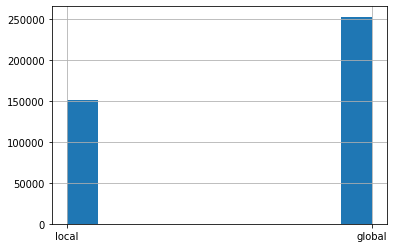

In [9]:
df.tweets_location.hist()

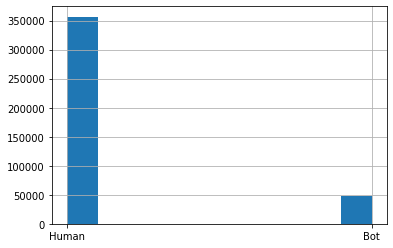

In [10]:
df.message_creator.hist()

In [11]:
Label = []
for i,row in df.iterrows():
  if row[1] == "global":
    Label.append(1)
  else:
    Label.append(0)
df["Label"] = Label

**Sampling training dataset.**

In [12]:
from sklearn.model_selection import train_test_split # we sample our data by using data split

In [13]:
df_train = df.sample(frac=0.8, random_state=200)


In [14]:
df_train, df_test = train_test_split(df, test_size=0.2)

In [15]:
df_train

,statuses_text,tweets_location,message_creator,length,Label
142259,rt nilikm breaking we just got a call from the...,global,Human,133,1
229238,narendramodi ji himself took the vaccine shot ...,global,Human,133,1
51802,rt jsphctrl âœein affrontâ while south africa...,local,Human,137,0
41779,rt norbertelekes new south africa approves ind...,local,Human,80,0
16586,rt ancalerts pfizerbiontech say their covid va...,local,Human,125,0
...,...,...,...,...,...
188325,india waiting for sputnik v supplybut supplyin...,local,Human,95,0
195605,rt nytimes disparities in vaccine access betwe...,global,Human,138,1
279970,covid19 vaccine eligibility checker check to s...,global,Human,110,1
87232,rt florian_krammer south africa halts use of a...,local,Human,133,0


**Model Training**

In [16]:
# here we are importing nltk,stopwords and porterstemmer we are using stemming on the text 
# we have and stopwords will help in removing the stopwords in the text

#re is regular expressions used for identifying only words in the text and ignoring anything else
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [17]:
# importing neural network libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Embedding,LSTM,Dropout
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
# here we are setting vocabulary size
voc_size=5000

In [19]:
x = df_train.drop('Label',axis = 1)
y = df_train['Label']

In [20]:
x

,statuses_text,tweets_location,message_creator,length
142259,rt nilikm breaking we just got a call from the...,global,Human,133
229238,narendramodi ji himself took the vaccine shot ...,global,Human,133
51802,rt jsphctrl âœein affrontâ while south africa...,local,Human,137
41779,rt norbertelekes new south africa approves ind...,local,Human,80
16586,rt ancalerts pfizerbiontech say their covid va...,local,Human,125
...,...,...,...,...
188325,india waiting for sputnik v supplybut supplyin...,local,Human,95
195605,rt nytimes disparities in vaccine access betwe...,global,Human,138
279970,covid19 vaccine eligibility checker check to s...,global,Human,110
87232,rt florian_krammer south africa halts use of a...,local,Human,133


In [21]:
messages = x.copy()
##Since we drop Null values from our Dataset ,so we need to Reset Index of our Dataset
messages.reset_index(inplace=True)

In [22]:
messages

,index,statuses_text,tweets_location,message_creator,length
0,142259,rt nilikm breaking we just got a call from the...,global,Human,133
1,229238,narendramodi ji himself took the vaccine shot ...,global,Human,133
2,51802,rt jsphctrl âœein affrontâ while south africa...,local,Human,137
3,41779,rt norbertelekes new south africa approves ind...,local,Human,80
4,16586,rt ancalerts pfizerbiontech say their covid va...,local,Human,125
...,...,...,...,...,...
323809,188325,india waiting for sputnik v supplybut supplyin...,local,Human,95
323810,195605,rt nytimes disparities in vaccine access betwe...,global,Human,138
323811,279970,covid19 vaccine eligibility checker check to s...,global,Human,110
323812,87232,rt florian_krammer south africa halts use of a...,local,Human,133


In [23]:

from matplotlib import pyplot as plt
%matplotlib inline

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
print(stopwords)

<WordListCorpusReader in '.../corpora/stopwords' (not loaded yet)>


*This cell will take a bit longer*

In [27]:
ps = PorterStemmer()
corpus = []
for i in range(0,len(messages)):
    result = re.sub('[^a-zA-Z]',' ',messages['statuses_text'][i])  
    result = result.lower()
    result = result.split()
    
    result = [ps.stem(word) for word in result if not word in stopwords.words("english")]
    result = " ".join(result)
    corpus.append(result)

In [28]:
onehot_repr = [one_hot(words,voc_size) for words in corpus]

In [29]:
sent_length = 20
embeded_docs = pad_sequences(onehot_repr,padding= 'pre',maxlen = sent_length)

In [30]:
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length = sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer = 'adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [31]:
x_final = np.array(embeded_docs)
y_final = np.array(y)
x_train,x_val,y_train,y_val = train_test_split(x_final,y_final,test_size=0.33,random_state=42)

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
dropout (Dropout)            (None, 20, 40)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [33]:
y_train

array([1, 0, 1, ..., 1, 1, 1])

In [34]:
history = model.fit(x_train,y_train,validation_data =(x_val,y_val),batch_size=64,epochs=10)

Epoch 1/10
3390/3390 [==============================] - 122s 35ms/step - loss: 0.0872 - accuracy: 0.9723 - val_loss: 0.0621 - val_accuracy: 0.9815
Epoch 2/10
3390/3390 [==============================] - 118s 35ms/step - loss: 0.0496 - accuracy: 0.9854 - val_loss: 0.0501 - val_accuracy: 0.9855
Epoch 3/10
3390/3390 [==============================] - 120s 35ms/step - loss: 0.0372 - accuracy: 0.9888 - val_loss: 0.0471 - val_accuracy: 0.9870
Epoch 4/10
3390/3390 [==============================] - 116s 34ms/step - loss: 0.0289 - accuracy: 0.9910 - val_loss: 0.0447 - val_accuracy: 0.9875
Epoch 5/10
3390/3390 [==============================] - 115s 34ms/step - loss: 0.0227 - accuracy: 0.9927 - val_loss: 0.0451 - val_accuracy: 0.9878
Epoch 6/10
3390/3390 [==============================] - 116s 34ms/step - loss: 0.0183 - accuracy: 0.9940 - val_loss: 0.0516 - val_accuracy: 0.9876
Epoch 7/10
3390/3390 [==============================] - 120s 35ms/step - loss: 0.0147 - accuracy: 0.9951 - val_loss: 0

In [35]:
def plot_learning_curve(history,epochs):
    #Accuracy
    epoch_range = range(1,epochs+1)
    plt.plot(epoch_range,history.history['accuracy'])
    plt.plot(epoch_range,history.history["val_accuracy"])
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(["Train","Val"],loc ="upper left")
    plt.show()

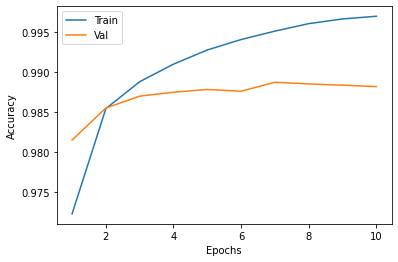

<Figure size 432x288 with 0 Axes>

In [36]:
plot_learning_curve(history,10)
plt.savefig('Accuracy')

In [37]:
y_pred = model.predict_classes(x_val)
accuracy_score(y_val,y_pred)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9881619704470377

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f740f917950>)

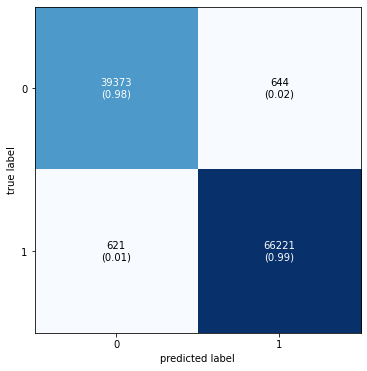

In [38]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_val,y_pred)
plot_confusion_matrix(mat,figsize=(6,6),show_normed=True)


**Local/global detection using Naive bayes Classifier**

In [39]:
import pandas as pd
import numpy as np
import os
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # Bag of Words: Term Frequencey and TFIDF
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
df.groupby('tweets_location').describe()

length                               ... Label               
                    count        mean        std   min  ...   25%  50%  75%  max
tweets_location                                         ...                     
global           253077.0  122.994954  22.942122   9.0  ...   1.0  1.0  1.0  1.0
local            151691.0  128.645345  14.447340  21.0  ...   0.0  0.0  0.0  0.0

[2 rows x 16 columns]

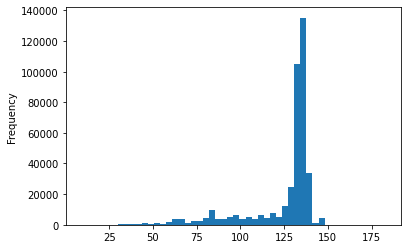

In [42]:
df['length'].plot(bins=50,kind='hist')

In [43]:
df.length.describe()

count    404768.000000
mean        125.112497
std          20.366431
min           9.000000
25%         127.000000
50%         134.000000
75%         136.000000
max         183.000000
Name: length, dtype: float64

In [44]:
df[df['length']==183]['statuses_text'].iloc[0]

'rt thesanghitroll royal family saas bahu drama amp oprah winfrey overacting gtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgtgt indias vaccine roâ'

**Text Pre-processing**

The classification algorithms that we've used so far needs some sort of numerical feature vector in order to perform the classification task. There are actually many methods to convert a corpus to a vector format. The simplest is the the bag-of-words approach, where each unique word in a text will be represented by one number.

In this section we'll convert the raw messages (sequence of characters) into vectors (sequences of numbers).

As a first step, we will write a function that will split a message into its individual words and return a list. We'll also remove very common words, ('the', It's pretty much the standard library in Python for processing text and has a lo'a', etc..). To do this we will use the NLTK.

In [45]:
# YOUR CODE HERE
# train and test data split by 70%(0.7) training data and 30% (0.3)testing data
text_train, text_test, y_train, y_test = train_test_split(
   df.statuses_text, df.Label, test_size=0.3, random_state=42)

**Binary Classifier for TFIDF and Word-Frequency**

With messages represented as vectors, we can finally train our spam/ham classifier. Now we can actually use almost any sort of classification algorithms. For a variety of reasons, the Naive Bayes classifier algorithm is a good choice.

In [46]:
def initialise_term_frequency_vectorizer(data):
    vectorizer_tf = CountVectorizer()
    vectorizer_tf.fit(data)
    X = vectorizer_tf.transform(data)
    return X, vectorizer_tf

def initialise_tfidf_vectorizer(data):
    vectorizer_tfidf = TfidfVectorizer()
    vectorizer_tfidf.fit(data)
    X = vectorizer_tfidf.transform(data)
    return X, vectorizer_tfidf

In [47]:
"""Check that squares returns the correct output for several inputs"""
X_train, vectorizer_tf = initialise_term_frequency_vectorizer(text_train)
X_train_tfidf, vectorizer_tfidf = initialise_tfidf_vectorizer(text_train)

In [48]:
X_train_tfidf.shape

(283337, 148029)

Now We've developed a model that can attempt to predict local vs global classification

**Logistic regression with word frequency data**

In [50]:
clf =  LogisticRegression(random_state=0, max_iter=1000).fit(X_train , y_train)
scores = cross_val_score(clf, X_train , y_train, cv=5) # cv is the length whivh is 5, in our case based on assert test.
# YOUR CODE SHOULD BE ABOVE THIS LINE
print("5-fold Cross-Validation Accuracy for Word Frequency: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

5-fold Cross-Validation Accuracy for Word Frequency: 0.99 (+/- 0.00)


**Logistic regression with TFIDF data**

In [51]:
clf_tfidf =  LogisticRegression(random_state=0, max_iter=1000).fit(X_train_tfidf , y_train)
scores_tfidf = cross_val_score(clf_tfidf, X_train_tfidf , y_train, cv=5)
# YOUR CODE SHOULD BE ABOVE THIS LINE
print("5-fold Cross-Validation Accuracy for TFIDF: %0.2f (+/- %0.2f)" % (scores_tfidf.mean(), scores_tfidf.std() * 2))

5-fold Cross-Validation Accuracy for TFIDF: 0.99 (+/- 0.00)


**Using F1 Score Instead.**

In [52]:
clf_f1 =  LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)
scores_f1 = cross_val_score(clf_f1, X_train , y_train, scoring="f1_micro" )


clf_tfidf_f1 =  LogisticRegression(random_state=0, max_iter=1000).fit(X_train_tfidf , y_train)
scores_tfidf_f1= cross_val_score(clf_tfidf_f1, X_train_tfidf , y_train, scoring="f1_micro")
# YOUR CODE SHOULD BE ABOVE THIS LINE
print("5-fold Cross-Validation F1 score for Word Frequency: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std() * 2))
print("5-fold Cross-Validation F1 score for TFIDF: %0.2f (+/- %0.2f)" % (scores_tfidf_f1.mean(), scores_tfidf_f1.std() * 2))

5-fold Cross-Validation F1 score for Word Frequency: 0.99 (+/- 0.00)
5-fold Cross-Validation F1 score for TFIDF: 0.99 (+/- 0.00)


**Testing the Losgistic regresssion model**

In [53]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
test_sample = text_test.iloc[2:3]
X_sample = vectorizer_tfidf.transform(test_sample)
test_sample # This should all be classified as Local data [1]

76769    rt cnn south africa is pausing some vaccine pl...
Name: statuses_text, dtype: object

In [55]:
clf.predict(X_sample)

array([1])